## This case study will remove the unnecessary part of the time-seires curves, and separate charging and discharging part.

In [25]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
import itertools
from scipy.stats import linregress
from itertools import islice
import statistics

%matplotlib inline

import dionysus as ds

In [2]:
# Define the sliding window
def slide_win(seq, win_size = 5):
    it = iter(seq)
    result = list(islice(it, win_size))
#     result = tuple(islice(it, win_size))
    if len(result) == win_size:
        yield resulta
    for elemt in it:
        result = result[1:] + list([elemt])
#         result = result[1:] + (elemt,)
        yield result

In [3]:
matFilename1 = './Data/2017-05-12_batchdata_updated_struct_errorcorrect.mat'
matFilename2 = './Data/2017-06-30_batchdata_updated_struct_errorcorrect.mat'
matFilename3 = './Data/2018-04-12_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename1)
bat = f['batch']
num_cells = bat['summary'].shape[0]

In [4]:
num_cells
list(islice([2,34,5,6, 6,6], 4)) 

[2, 34, 5, 6]

In [41]:
sclr01 = MinMaxScaler()
cell_selct = 2
cyc_select = 100
cycles = f[bat['cycles'][cell_selct,0]]
cycle_dict = {}
cycle_dict_pdstd = {}
cycle_dict_dis_std = {}
cycle_dict_dis_nrm = {}
cycle_dict_dis = {}

I = np.hstack((f[cycles['I'][cyc_select,0]][()]))
dis_begin_id = np.where(I < -3.5)[0][0]
I_sdd = (I-np.mean(I)) / np.std(I)
I_dis = I[dis_begin_id:]
I_dis_nrm = sclr01.fit_transform(I_dis.reshape(-1,1)).T[0].tolist()
I_dis_sd = (I_dis-np.mean(I_dis)) / np.std(I_dis)

Qc = np.hstack((f[cycles['Qc'][cyc_select,0]][()]))
Qc_sdd = (Qc-np.mean(Qc)) / np.std(Qc)

Qd = np.hstack((f[cycles['Qd'][cyc_select,0]][()]))
Qd_sdd = (Qd-np.mean(Qd)) / np.std(Qd)
Qd_dis = Qd[dis_begin_id:]
Qd_dis_nrm = sclr01.fit_transform(Qd_dis.reshape(-1,1)).T[0].tolist()
Qd_dis_sd = (Qd_dis-np.mean(Qd_dis)) / np.std(Qd_dis)

Qdlin = np.hstack((f[cycles['Qdlin'][cyc_select,0]][()]))

T = np.hstack((f[cycles['T'][cyc_select,0]][()]))
T_sdd = (T-np.mean(T)) / np.std(T)
T_dis = T[dis_begin_id:]
T_dis_nrm = sclr01.fit_transform(T_dis.reshape(-1,1)).T[0].tolist()
T_dis_sd = (T_dis-np.mean(T_dis)) / np.std(T_dis)

Tdlin = np.hstack((f[cycles['Tdlin'][cyc_select,0]][()]))

V = np.hstack((f[cycles['V'][cyc_select,0]][()]))
V_sdd = (V-np.mean(V)) / np.std(V)
V_dis = V[dis_begin_id:]
V_dis_nrm = sclr01.fit_transform(V_dis.reshape(-1,1)).T[0].tolist()
V_dis_sd = (V_dis-np.mean(V_dis)) / np.std(V_dis)

dQdV = np.hstack((f[cycles['discharge_dQdV'][cyc_select,0]][()]))

t = np.hstack((f[cycles['t'][cyc_select,0]][()]))
t_dis = t[dis_begin_id:]

cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
cycle_dict[str(cyc_select)] = cd
# cycle_dict_pd[str(j)] = pd.DataFrame(data=np.array([I, V, Qc, Qd, T]).T, 
#                                      index=t,
#                                      columns=['I', 'V', 'Qc', 'Qd', 'T'])
cycle_dict_pdstd[str(cyc_select)] = pd.DataFrame(data=np.array([I_sdd, V_sdd, Qc_sdd, Qd_sdd, T_sdd]).T, 
                                     index=t,
                                     columns=['I', 'V', 'Qc', 'Qd', 'T'])
cycle_dict_dis_std[str(cyc_select)] = {'I': I_dis_sd, 'Qd': Qd_dis_sd, 'Qdlin': Qdlin, 
                                       'T': T_dis_sd, 'Tdlin': Tdlin, 'V':V_dis_sd, 
                                       'dQdV': dQdV, 't_dis':t_dis}
cycle_dict_dis_nrm[str(cyc_select)] = {'I': I_dis_nrm, 'Qd': Qd_dis_nrm, 'Qdlin': Qdlin, 
                                       'T': T_dis_nrm, 'Tdlin': Tdlin, 'V':V_dis_nrm, 
                                       'dQdV': dQdV, 't_dis':t_dis}
cycle_dict_dis[str(cyc_select)] = {'I': I_dis, 'Qd': Qd_dis, 'Qdlin': Qdlin, 
                                       'T': T_dis, 'Tdlin': Tdlin, 'V':V_dis, 
                                       'dQdV': dQdV, 't_dis':t_dis}
# for 

In [50]:
# plt.plot(cd['I'],)
# cd['I'][np.where(cd['I']< -2.)]
# dis_begin_id = np.where(cd['I']< -2.)[0][0]
# dis_begin_id
# t.tolist()
# cycle_dict_pdstd['200'][cycle_dict_pdstd['200'].index<1.]
# cycle_dict_pdstd['100'].index.values.tolist()

# len(t.tolist()[dis_begin_id:])
# t.tolist()[dis_begin_id:]
# [tt+1] - t.tolist()[dis_begin_id:][tt]
# plt.plot(cd['Qc'])
# plt.plot(cd['Qd'])
# 0.9/ max(cd['Qc'])
# I[dis_begin_id:]
# t_dis.tolist()
# cycle_dict_dis_nrm[str(cyc_select)][colll]
# t_sld = slide_win(cycle_dict_dis_nrm[str(cyc_select)]['t_dis'].tolist(), sld_winsize)
# for ttt in t_sld:
#     print(ttt)
# cycle_dict_dis_nrm[str(cyc_select)]['t_dis'].tolist()
plt.plot(cd['dQdV'][:])
data_ = cd['T'][:]
tau=2
data_lag0 = data_[:-2].flatten()
data_lag1 = np.roll(data_, -tau)[:-2].flatten()
data_lag2 = np.roll(data_, -2 * tau)[:-2].flatten()
# axes.plot3D(data_lag0, data_lag1, data_lag2)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
# ax3.plot3D(data_lag0, data_lag1, data_lag2)
ax3.scatter(data_lag0, data_lag1, data_lag2, s=5)
# ax3.scatter(cd['I'], cd['V'], cd['T'], s=5)

No handles with labels found to put in legend.


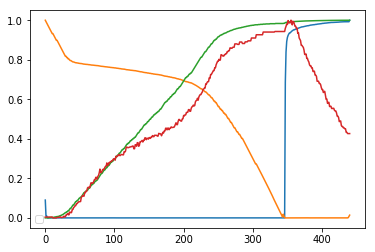

In [42]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# for colll in ['I', 'V', 'Qc', 'Qd', 'T']:
for colll in ['I', 'V', 'Qd', 'T']:
#     ax1.plot(cycle_dict_pdstd['810'][colll])
#     ax1.plot(cycle_dict_pdstd[str(cyc_select)][colll][dis_begin_id:])
#     ax1.plot(cycle_dict_pdstd[str(cyc_select)][colll].values[dis_begin_id:])
#     ax1.plot(cycle_dict_dis_std[str(cyc_select)][colll])
    ax1.plot(cycle_dict_dis_nrm[str(cyc_select)][colll])
ax1.legend(loc='lower left', ncol=5)

(-0.0, 0.5)

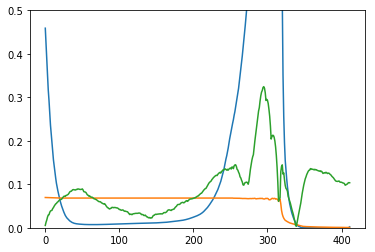

In [54]:
# Normalize to [0,1] first and then calculate the slope
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
sld_winsize = 30
cycle_dict_dis_slope = {}
for colll in ['I', 'V', 'Qd', 'T']:
    t_sld = slide_win(cycle_dict_dis_nrm[str(cyc_select)]['t_dis'].tolist(), sld_winsize)
    meas_sld = slide_win(cycle_dict_dis_nrm[str(cyc_select)][colll], sld_winsize)
    slope_arr = []
    for t_s_t, meas_t_t in zip(t_sld, meas_sld):
        slp_t, _, _, _, _ = linregress(t_s_t, meas_t_t)
        slope_arr.append(slp_t)
        t_med = statistics.median(t_s_t)
#         print(slp_t)
#         ax2.plot(t_med, slp_t)
    cycle_dict_dis_slope[colll] = slope_arr
t_sld = slide_win(cycle_dict_dis_nrm[str(cyc_select)]['t_dis'].tolist(), sld_winsize)

# for colll in ['I', 'V', 'Qd', 'T']:
for colll in [ 'V', 'Qd', 'T']:
    ax2.plot(np.abs(cycle_dict_dis_slope[colll]))
ax2.set_ylim(-.0,.5)

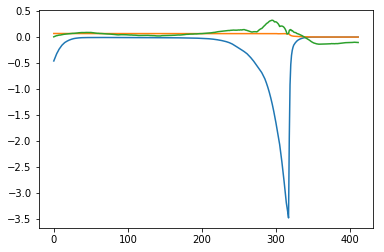

In [53]:
# calculate slope first, then scale to [0,1] or standardize.
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
sld_winsize = 30
cycle_dict_dis_slope = {}
for colll in ['I', 'V', 'Qd', 'T']:
    t_sld = slide_win(cycle_dict_dis[str(cyc_select)]['t_dis'].tolist(), sld_winsize)
#     meas_sld = slide_win(cycle_dict_dis[str(cyc_select)][colll], sld_winsize)
    meas_sld = slide_win(cycle_dict_dis_nrm[str(cyc_select)][colll], sld_winsize)
    slope_arr = []
    for t_s_t, meas_t_t in zip(t_sld, meas_sld):
        slp_t, _, _, _, _ = linregress(t_s_t, meas_t_t)
        slope_arr.append(slp_t)
        t_med = statistics.median(t_s_t)
#         print(slp_t)
#         ax2.plot(t_med, slp_t)
#     cycle_dict_dis_slope[colll] = (slope_arr-np.mean(slope_arr))/np.std(slope_arr)
#     cycle_dict_dis_slope[colll] = sclr01.fit_transform(np.array(slope_arr).reshape(1,-1)).tolist()
        cycle_dict_dis_slope[colll] = slope_arr
t_sld = slide_win(cycle_dict_dis_nrm[str(cyc_select)]['t_dis'].tolist(), sld_winsize)

# for colll in ['I', 'V', 'Qd', 'T']:
for colll in [ 'V', 'Qd', 'T']:
#     ax2.plot(np.abs(cycle_dict_dis_slope[colll]))
    ax2.plot(cycle_dict_dis_slope[colll])
# ax2.set_ylim(-.5,.5)

In [37]:
# calculate slope first, then scale to [0,1] or standardize.
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
sld_winsize = 50
cycle_dict_dis_slope = {}
for colll in ['I', 'V', 'Qd', 'T']:
    t_sld = slide_win(cycle_dict_dis[str(cyc_select)]['t_dis'].tolist(), sld_winsize)
    meas_sld = slide_win(cycle_dict_dis[str(cyc_select)][colll], sld_winsize)
#     meas_sld = slide_win(cycle_dict_dis_nrm[str(cyc_select)][colll], sld_winsize)
    slope_arr = []
    for t_s_t, meas_t_t in zip(t_sld, meas_sld):
        slp_t, _, _, _, _ = linregress(t_s_t, meas_t_t)
        slope_arr.append(slp_t)
        t_med = statistics.median(t_s_t)
#         print(slp_t)
#         ax2.plot(t_med, slp_t)
#     cycle_dict_dis_slope[colll] = (slope_arr-np.mean(slope_arr))/np.std(slope_arr)
    cycle_dict_dis_slope[colll] = sclr01.fit_transform(np.array([slope_arr]).reshape(-1,1)).tolist()
#     cycle_dict_dis_slope[colll] = slope_arr
t_sld = slide_win(cycle_dict_dis_nrm[str(cyc_select)]['t_dis'].tolist(), sld_winsize)

for colll in ['I', 'V', 'Qd', 'T']:
# for colll in [ 'V', 'Qd', 'T']:
#     ax2.plot(np.abs(cycle_dict_dis_slope[colll]))
    ax2.plot(cycle_dict_dis_slope[colll])
# ax2.set_ylim(-.5,.5)

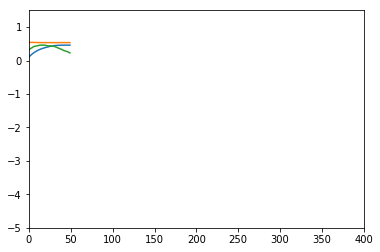

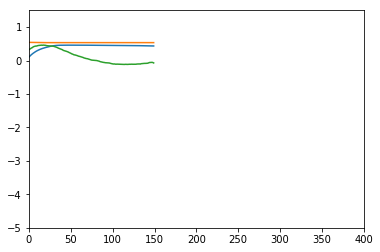

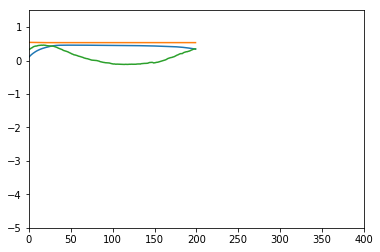

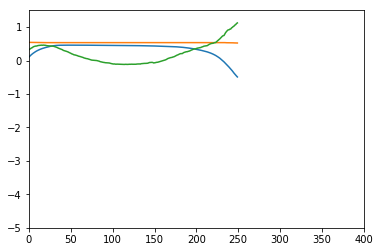

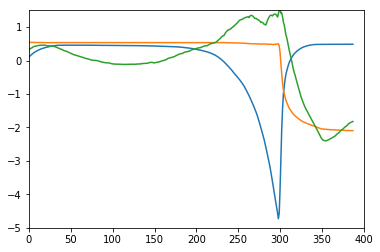

In [25]:
for hori_ in [50, 150, 200, 250, 350, 400]:
    fig4 = plt.figure()
    ax4 = fig4.add_subplot(111)
    for colll in [ 'V', 'Qd', 'T']:
    #     ax2.plot(np.abs(cycle_dict_dis_slope[colll]))
        ax4.plot(cycle_dict_dis_slope[colll][:hori_])
        ax4.set_xlim(0, 400)
        ax4.set_ylim(-5, 1.5)
    fig4.savefig(f'./figs/aux/up_lim{hori_}')

No handles with labels found to put in legend.


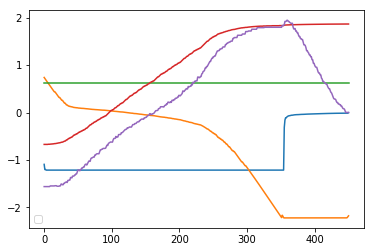

In [151]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
for colll in ['I', 'V', 'Qc', 'Qd', 'T']:
#     ax1.plot(cycle_dict_pdstd['810'][colll])
#     ax1.plot(cycle_dict_pdstd[str(cyc_select)][colll][dis_begin_id:])
    ax1.plot(cycle_dict_pdstd[str(cyc_select)][colll].values[dis_begin_id:])
ax1.legend(loc='lower left', ncol=5)

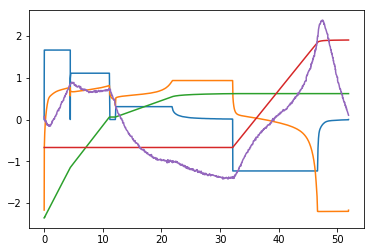

In [81]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
for colll in ['I', 'V', 'Qc', 'Qd', 'T']:
#     ax1.plot(cycle_dict_pdstd['810'][colll])
    ax1.plot(cycle_dict_pdstd[str(cyc_select)][colll])
#     ax1.plot(cycle_dict_pdstd[str(cyc_select)][colll].values[dis_begin_id:])
# ax1.legend(loc='lower left', ncol=5)

## Dionysus2 Extended Persistence Test

In [8]:
w = -1

values = [.5,2,3,4]
simplices = [[0], [1], [2], [3], [0,1], [0,3], [1,2], [2,3]]\

up_simplices = [ds.Simplex(s, max(values[v] for v in s)) for s in simplices]
down_simplices = [ds.Simplex(s+[w], min(values[v] for v in s)) for s in simplices]

up_simplices.sort()
down_simplices.sort(reverse=True)

flt = ds.Filtration([ds.Simplex([w], -float('inf'))] + up_simplices + down_simplices)

m = ds.homology_persistence(flt)
dgms = ds.init_diagrams(m, flt)

In [9]:
for ss in dgms[1]:
    print(ss)

(4,0.5)
